SES KLASÖRÜNDEKİ VERİLERİN HİSTOGRAMLARI

İşleniyor: azra_01.wav


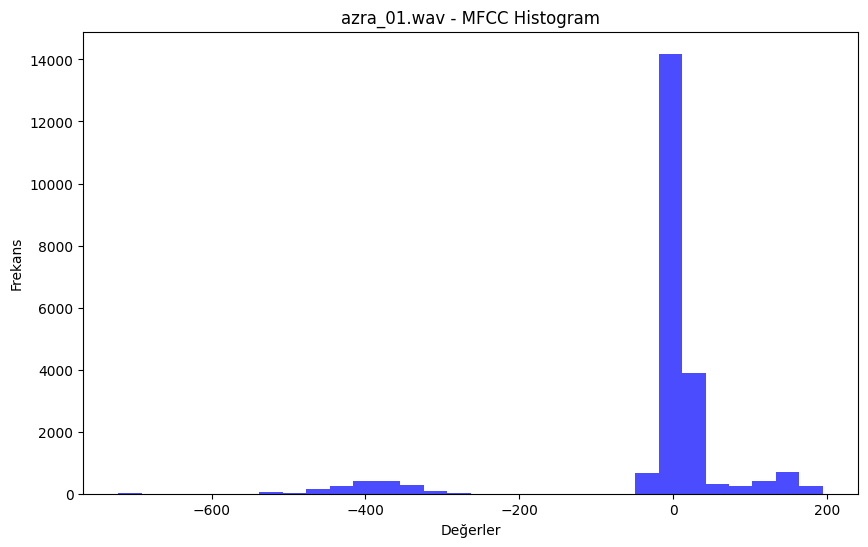

İşleniyor: azra_02.wav


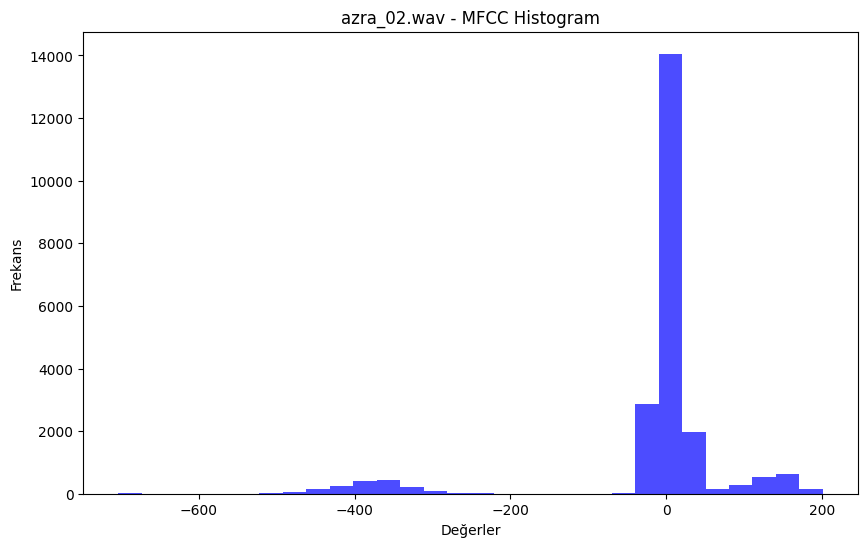

İşleniyor: azra_04.wav


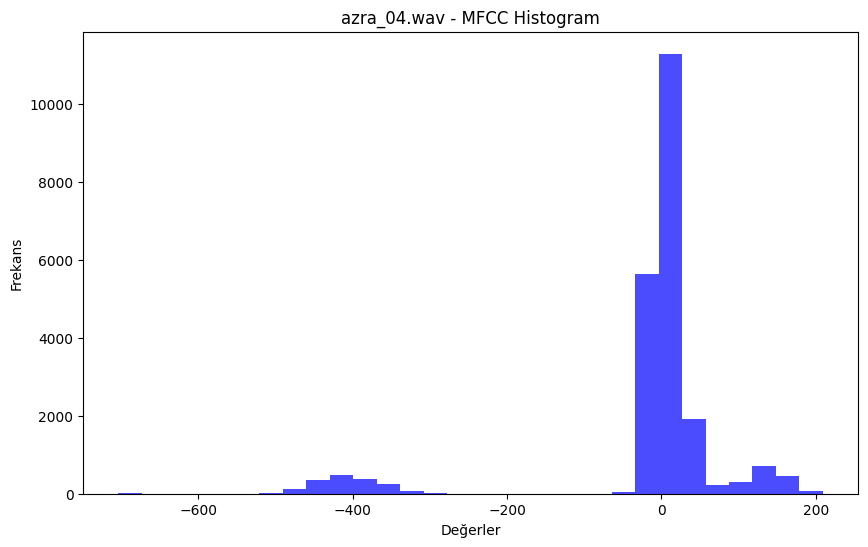

İşleniyor: azra_05.wav


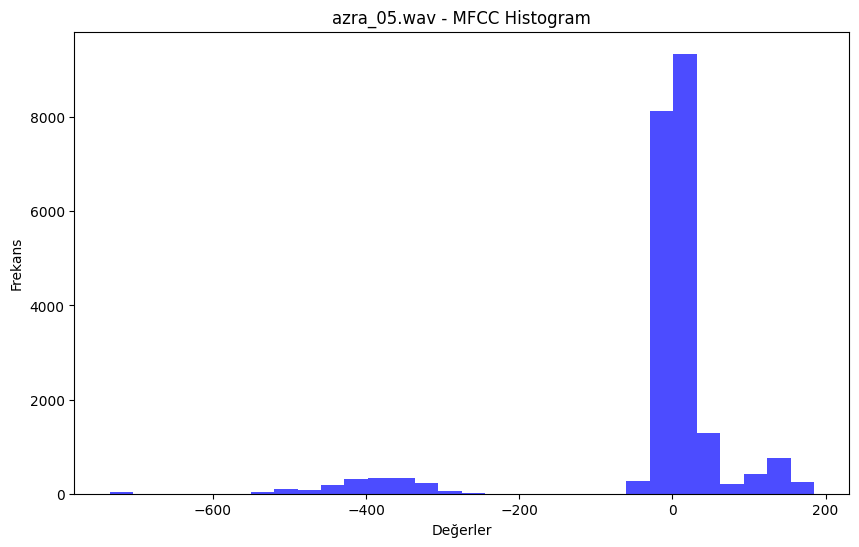

İşleniyor: guzel_01.wav


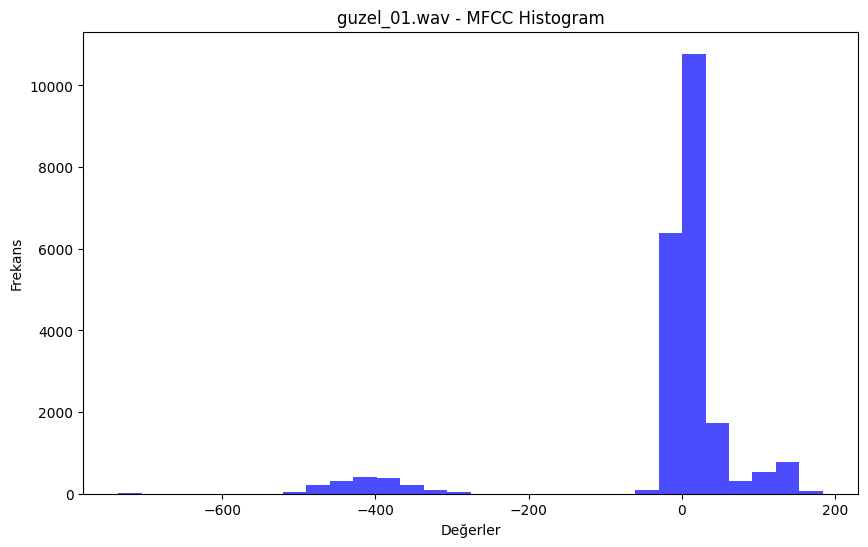

İşleniyor: guzel_02.wav


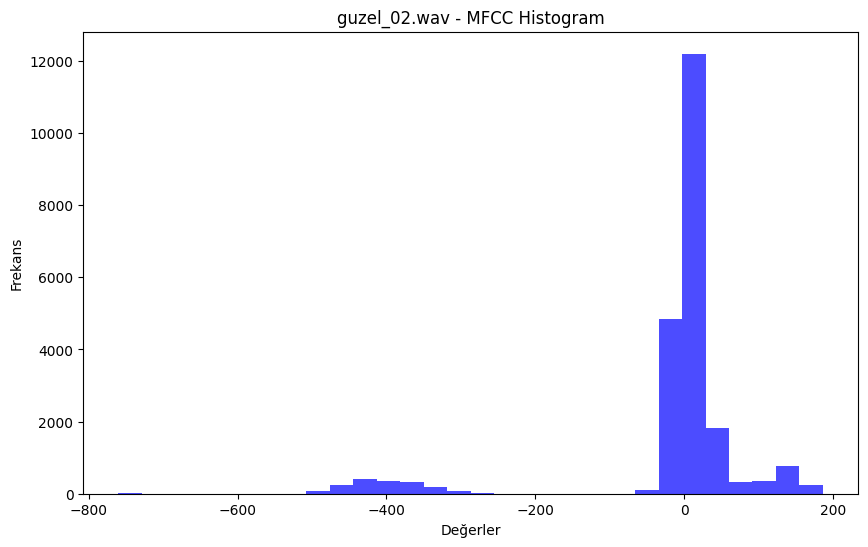

İşleniyor: guzel_04.wav


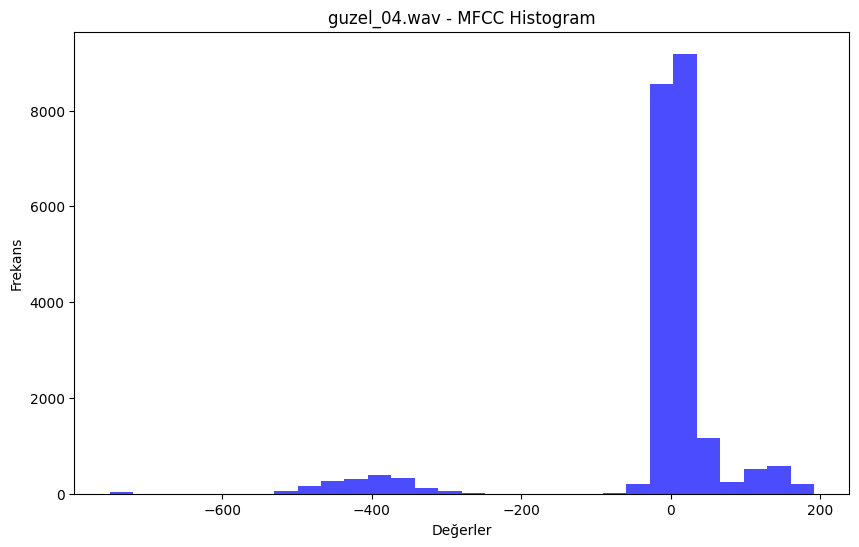

İşleniyor: guzel_05.wav


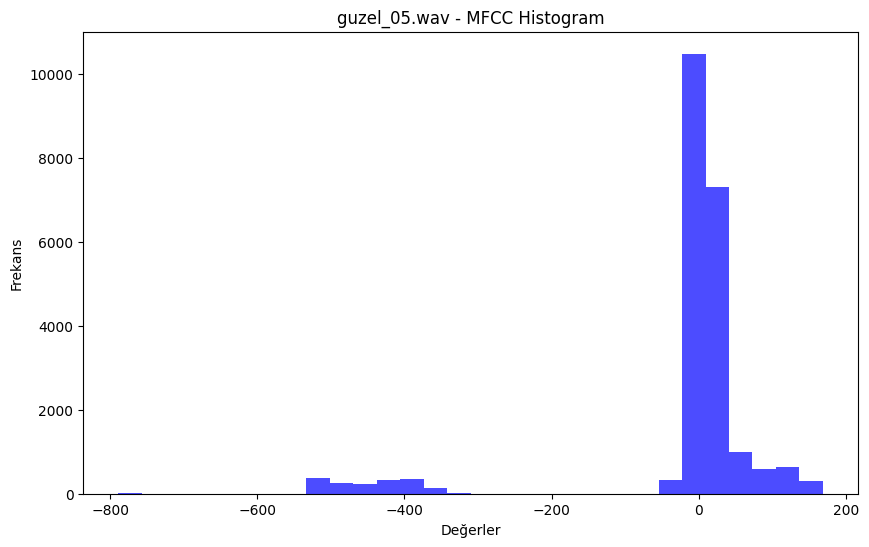

İşleniyor: rumeysa_01.wav


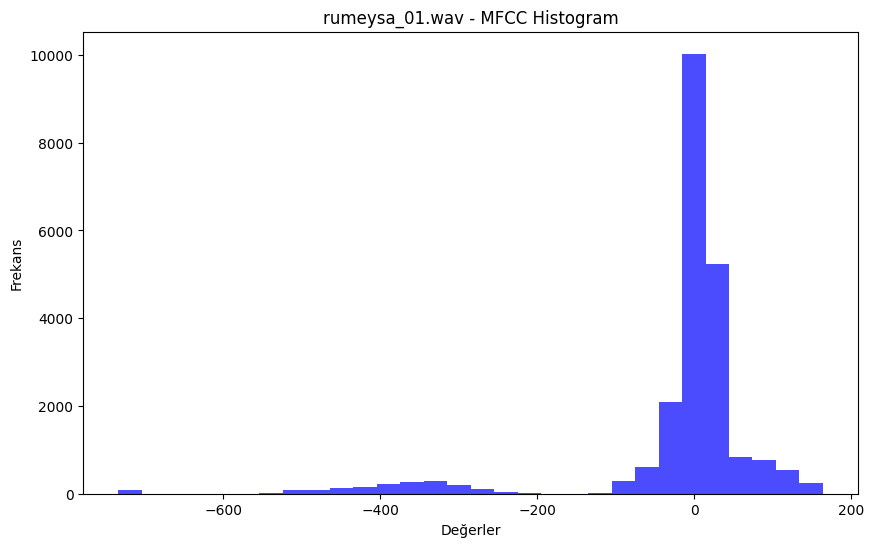

İşleniyor: rumeysa_02.wav


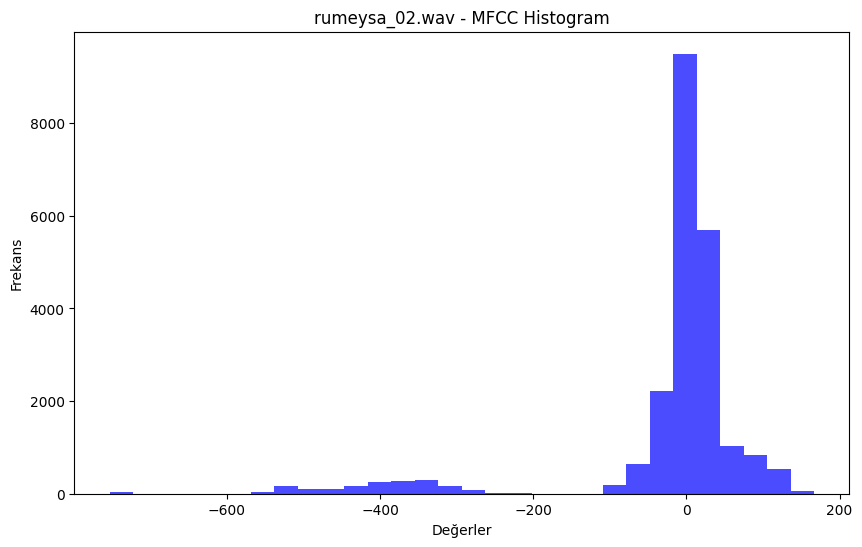

İşleniyor: rumeysa_03.wav


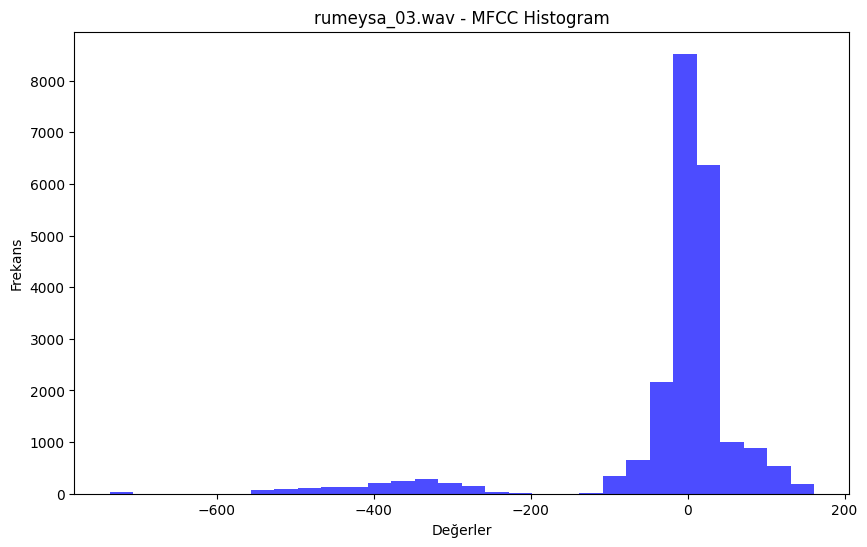

İşleniyor: rumeysa_04.wav


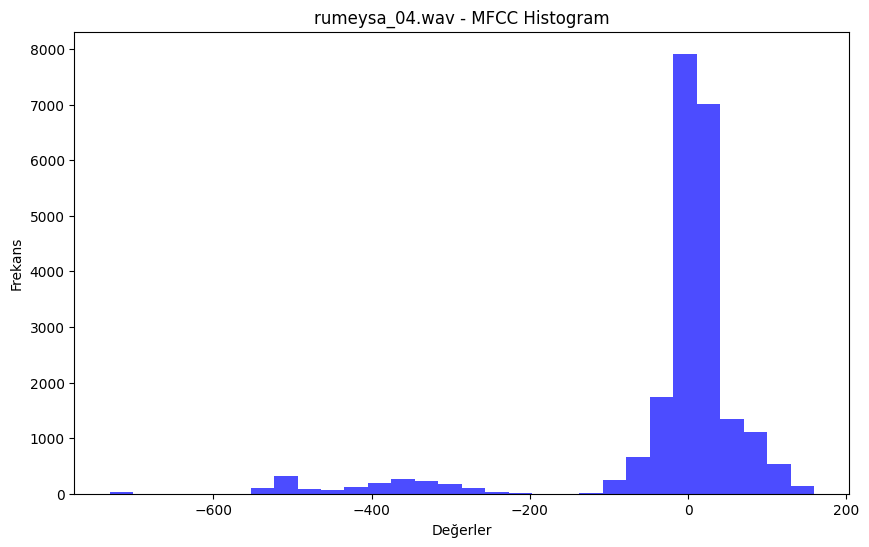

In [1]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt

# Ses dosyalarının bulunduğu klasör
data_folder = "ses_verileri"

# Ses dosyalarını işleme
for file_name in os.listdir(data_folder):
    if file_name.endswith('.wav'):  # Yalnızca .wav dosyalarını işleme
        file_path = os.path.join(data_folder, file_name)
        print(f"İşleniyor: {file_name}")
        
        # Ses dosyasını yükleme
        y, sr = librosa.load(file_path, sr=None)
        
        # MFCC çıkarma
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        
        # Histogram çizme
        plt.figure(figsize=(10, 6))
        plt.hist(mfccs.flatten(), bins=30, color='blue', alpha=0.7)
        plt.title(f"{file_name} - MFCC Histogram")
        plt.xlabel("Değerler")
        plt.ylabel("Frekans")
        plt.show()


BİR SESİN HİSTOGRAM VE SPEKTURUMUNU BULMA

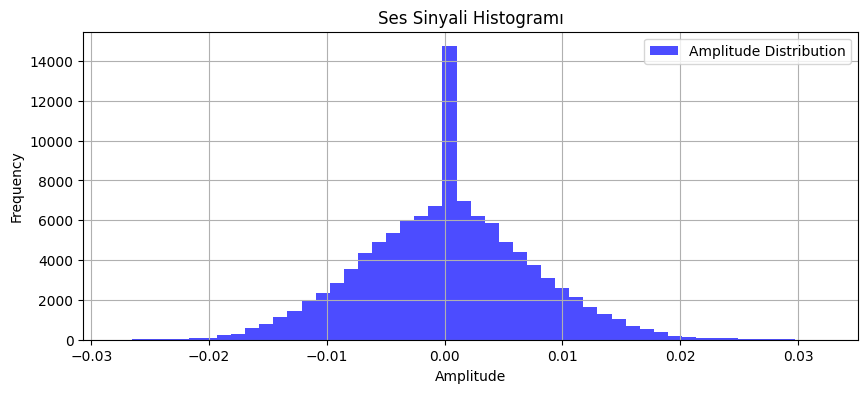

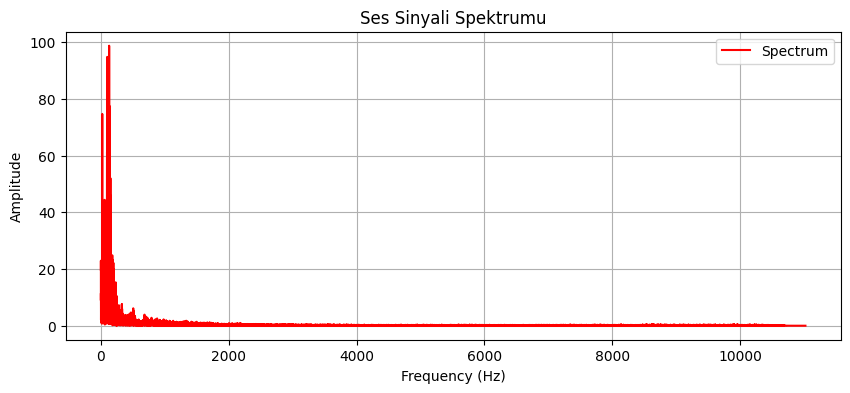

In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Ses dosyasını yükleme ve işleme
def ses_isleme(file_path):
    y, sr = librosa.load(file_path, duration=5)  # Ses dosyasını yükle (5 saniye ile sınırla)
    return y, sr

# Histogram oluşturma
def ses_histogram(y):
    plt.figure(figsize=(10, 4))
    plt.hist(y, bins=50, color='blue', alpha=0.7, label='Amplitude Distribution')
    plt.title("Ses Sinyali Histogramı")
    plt.xlabel("Amplitude")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

# Spektrum (Frekans Analizi) oluşturma
def ses_spectrum(y, sr):
    fft = np.fft.fft(y)  # FFT ile frekans analizi
    magnitude = np.abs(fft)  # Genlik değerlerini al
    freq = np.fft.fftfreq(len(magnitude), 1/sr)  # Frekans değerlerini al
    
    plt.figure(figsize=(10, 4))
    plt.plot(freq[:len(freq)//2], magnitude[:len(magnitude)//2], color='red', label='Spectrum')  # Yalnızca pozitif frekanslar
    plt.title("Ses Sinyali Spektrumu")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# Test: Ses dosyası üzerinde histogram ve spektrum
file_path = "mikrofon_kayit.wav"  # Ses dosyanızın yolu
y, sr = ses_isleme(file_path)

# Histogram
ses_histogram(y)

# Spektrum
ses_spectrum(y, sr)
